<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/Self_Organizing_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate Sample Data

In [ ]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=0)

# Define SOM Parameters

In [ ]:
m = 10  # Number of rows
n = 10  # Number of columns
learning_rate = 0.5
epochs = 100

# Initialize SOM Weights

In [ ]:
weights = np.random.rand(m, n, X.shape[1])

# SOM Algorithm

In [ ]:
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Find the best-matching unit (BMU)
        distances = np.linalg.norm(X[i] - weights, axis=2)
        bmu_index = np.unravel_index(np.argmin(distances), (m, n))

        # Update weights of BMU and its neighbors
        neighborhood_radius = m // (epoch + 1)  # Adjust neighborhood radius
        for j in range(max(0, bmu_index[0] - neighborhood_radius), min(m, bmu_index[0] + neighborhood_radius + 1)):
            for k in range(max(0, bmu_index[1] - neighborhood_radius), min(n, bmu_index[1] + neighborhood_radius + 1)):
                weights[j, k] += learning_rate * (X[i] - weights[j, k])

    # Update learning rate and neighborhood radius
    learning_rate *= 0.99

# Visualize SOM Results

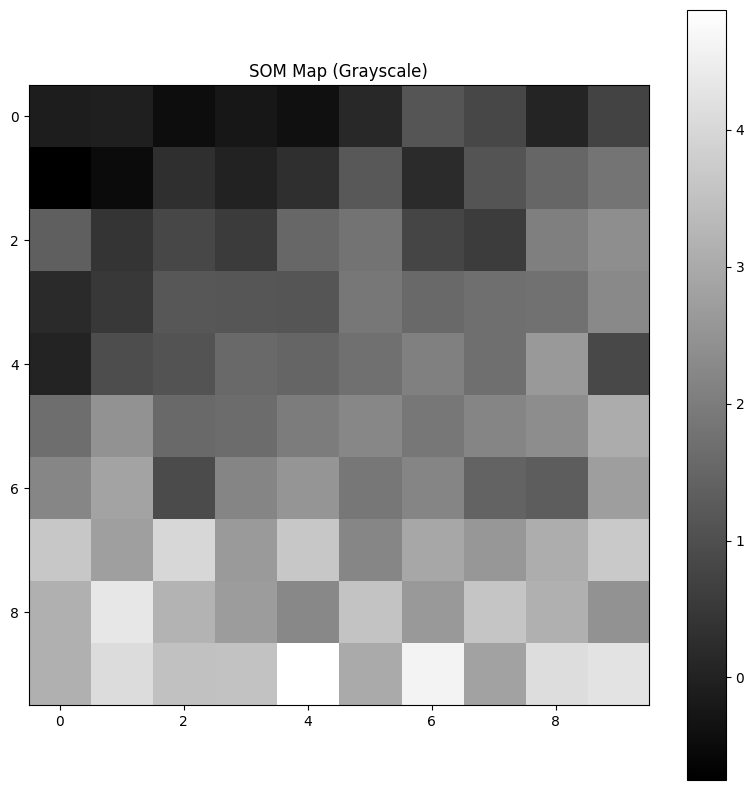

In [ ]:
grayscale_weights = np.mean(weights, axis=2)

plt.figure(figsize=(10, 10))
plt.imshow(grayscale_weights, interpolation='nearest', cmap='gray')  # Use 'gray' colormap
plt.colorbar()
plt.title('SOM Map (Grayscale)')
plt.show()

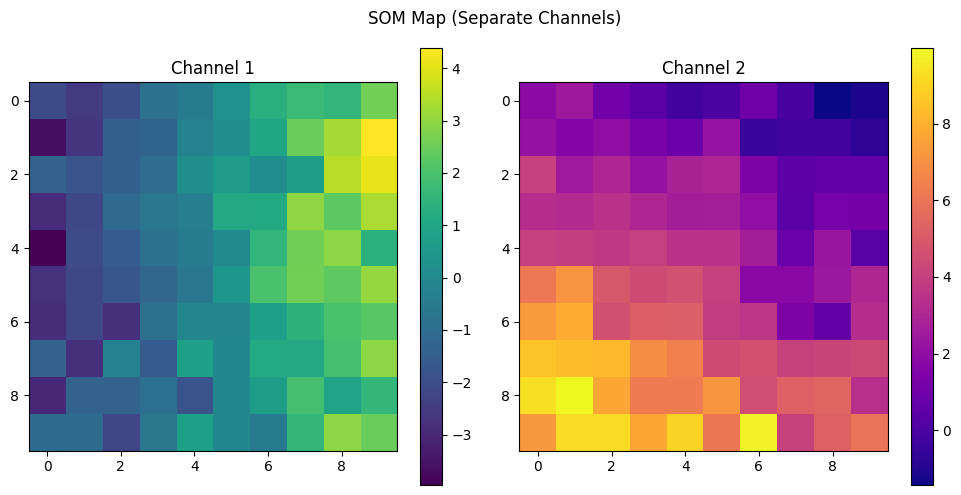

In [ ]:
plt.figure(figsize=(10, 5))

# Plot first channel
plt.subplot(1, 2, 1)
plt.imshow(weights[:, :, 0], interpolation='nearest', cmap='viridis')  # Use a suitable colormap
plt.colorbar()
plt.title('Channel 1')

# Plot second channel
plt.subplot(1, 2, 2)
plt.imshow(weights[:, :, 1], interpolation='nearest', cmap='plasma')  # Use a different colormap
plt.colorbar()
plt.title('Channel 2')

plt.suptitle('SOM Map (Separate Channels)')  # Add a supertitle
plt.tight_layout()  # Adjust spacing between subplots
plt.show()